In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import dask.dataframe as dd
import datetime as dt
import seaborn as sns

In [2]:
#defining columns i will work with. this is important considering the original size of the dataset
mycolumns = ['REPORTER_CITY', 'REPORTER_STATE','BUYER_CITY','BUYER_STATE','DRUG_NAME','QUANTITY','Ingredient_Name','TRANSACTION_DATE']

In [3]:
#define the data type of each column to reduce calculation errors
traintypes = {'BUYER_CITY': 'str',
              'BUYER_STATE': 'str',
              'DRUG_NAME': 'str',
              'QUANTITY': 'int64',
              'TRANSACTION_DATE': 'int64',
              'Ingredient_Name': 'str'
              }

In [4]:
file_path = 'arcos_all_washpost.tsv'

In [5]:
pills = dd.read_csv(file_path,sep='\t', usecols=mycolumns, dtype=traintypes)
pills.head(5)

,REPORTER_CITY,REPORTER_STATE,BUYER_CITY,BUYER_STATE,DRUG_NAME,QUANTITY,TRANSACTION_DATE,Ingredient_Name
0,BROCKTON,MA,MALDEN,MA,HYDROCODONE,1,12262012,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE
1,PHOENIX,AZ,PHOENIX,AZ,HYDROCODONE,4,3112009,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE
2,PHOENIX,AZ,GILBERT,AZ,HYDROCODONE,40,11252008,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE
3,PHOENIX,AZ,GILBERT,AZ,HYDROCODONE,20,6122009,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE
4,PHOENIX,AZ,GILBERT,AZ,HYDROCODONE,10,10022009,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE


In [6]:
#graph of pills bought by state

#first we create the groupby, use compute() on that set, sort values, and then graph (Paul Mooney in Kaggle)

#def quantityCounter(dataframe,columnToCount):
    #quantityCount = dataframe.groupby(columnToCount)['QUANTITY'].sum()
    #quantityCount = quantityCount.compute().sort_values(ascending=False)
    #df = pd.DataFrame(data=quantityCount)
    #return df

In [7]:
state = pills.groupby('BUYER_STATE')['QUANTITY'].sum()
state = state.compute().sort_values(ascending=False)


In [8]:
state_df = state.reset_index()
state_df.columns = ['BUYER_STATE', 'QUANTITY']

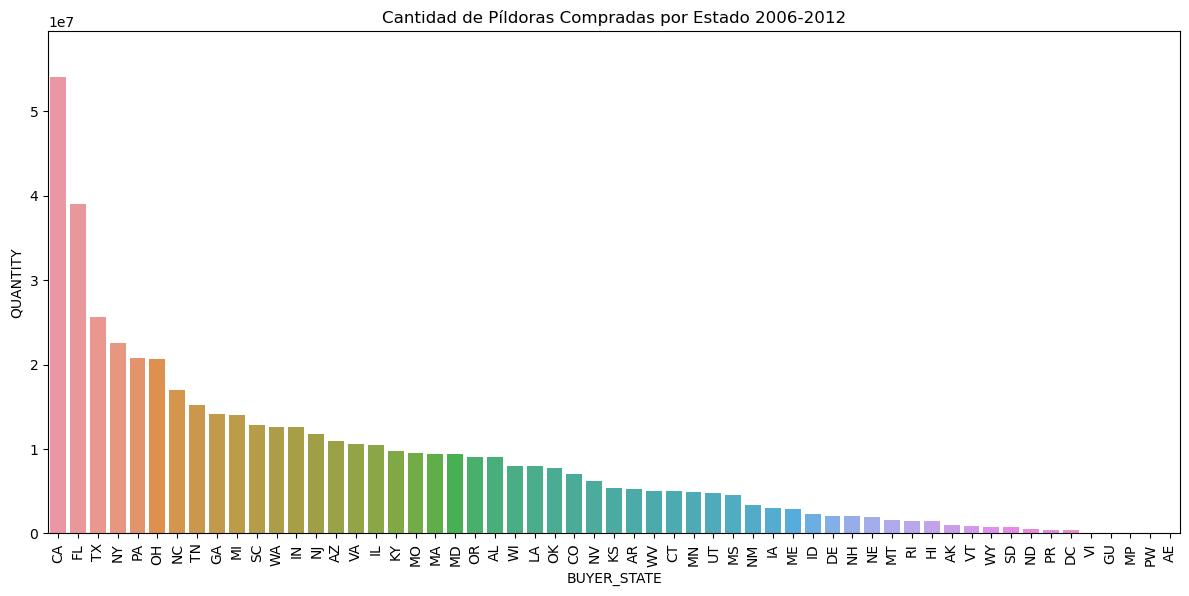

In [9]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(data=state_df, x='BUYER_STATE', y='QUANTITY')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.ylim(0, max(state_df['QUANTITY']) * 1.1)

plt.tight_layout()

plt.title('Cantidad de Píldoras Compradas por Estado 2006-2012')
plt.show()

In [10]:
#So... the initial plot I have created, vertical, didnt run properly after restarting the kernel.
# I had to check again with ai to rebuild it. 


#plt.figure(figsize=(8,14))
#ax = 
#sns.barplot(data=state_df, x='BUYER_STATE', y='QUANTITY', orient='v', hue='BUYER_STATE')
# Add data labels 

#(asked Copilot, ChatGPT and Perplexity for a suggestion; chose Perplexity as it allowed to see the 
#absolute value and not exponential notation (which i should investigate more on how to fix it from the start)

#for i, v in enumerate(state_df['QUANTITY']):
    #ax.text(v, i, f' {v:,.0f}', va='center', ha='left')

# Adjust x-axis to make room for labels
#plt.xlim(0, max(state_df['QUANTITY']) * 1.1)

#plt.tight_layout()

#plt.title('Cantidad de Píldoras Compradas por Estado')

In [11]:
#converting the data column to a datetime type, first testing with a sample of the set

fecha = pills.head()

In [12]:
fecha

,REPORTER_CITY,REPORTER_STATE,BUYER_CITY,BUYER_STATE,DRUG_NAME,QUANTITY,TRANSACTION_DATE,Ingredient_Name
0,BROCKTON,MA,MALDEN,MA,HYDROCODONE,1,12262012,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE
1,PHOENIX,AZ,PHOENIX,AZ,HYDROCODONE,4,3112009,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE
2,PHOENIX,AZ,GILBERT,AZ,HYDROCODONE,40,11252008,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE
3,PHOENIX,AZ,GILBERT,AZ,HYDROCODONE,20,6122009,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE
4,PHOENIX,AZ,GILBERT,AZ,HYDROCODONE,10,10022009,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE


In [13]:
fecha['DATUM'] = pd.to_datetime(fecha['TRANSACTION_DATE'].astype(str), format='%m%d%Y')


In [14]:
fecha

,REPORTER_CITY,REPORTER_STATE,BUYER_CITY,BUYER_STATE,DRUG_NAME,QUANTITY,TRANSACTION_DATE,Ingredient_Name,DATUM
0,BROCKTON,MA,MALDEN,MA,HYDROCODONE,1,12262012,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,2012-12-26
1,PHOENIX,AZ,PHOENIX,AZ,HYDROCODONE,4,3112009,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,2009-03-11
2,PHOENIX,AZ,GILBERT,AZ,HYDROCODONE,40,11252008,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,2008-11-25
3,PHOENIX,AZ,GILBERT,AZ,HYDROCODONE,20,6122009,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,2009-06-12
4,PHOENIX,AZ,GILBERT,AZ,HYDROCODONE,10,10022009,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,2009-10-02


In [15]:
pills['DATUM'] = dd.to_datetime(pills['TRANSACTION_DATE'].astype(str), format='%m%d%Y')

In [16]:
pills.head()

,REPORTER_CITY,REPORTER_STATE,BUYER_CITY,BUYER_STATE,DRUG_NAME,QUANTITY,TRANSACTION_DATE,Ingredient_Name,DATUM
0,BROCKTON,MA,MALDEN,MA,HYDROCODONE,1,12262012,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,2012-12-26
1,PHOENIX,AZ,PHOENIX,AZ,HYDROCODONE,4,3112009,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,2009-03-11
2,PHOENIX,AZ,GILBERT,AZ,HYDROCODONE,40,11252008,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,2008-11-25
3,PHOENIX,AZ,GILBERT,AZ,HYDROCODONE,20,6122009,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,2009-06-12
4,PHOENIX,AZ,GILBERT,AZ,HYDROCODONE,10,10022009,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,2009-10-02


In [17]:
#Checking usage of drugs across time, but I should work with the years and months maybe separately
pills['year'] = pills['DATUM'].dt.year
pills['month'] = pills['DATUM'].dt.month

In [18]:
pills.head()

,REPORTER_CITY,REPORTER_STATE,BUYER_CITY,BUYER_STATE,DRUG_NAME,QUANTITY,TRANSACTION_DATE,Ingredient_Name,DATUM,year,month
0,BROCKTON,MA,MALDEN,MA,HYDROCODONE,1,12262012,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,2012-12-26,2012,12
1,PHOENIX,AZ,PHOENIX,AZ,HYDROCODONE,4,3112009,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,2009-03-11,2009,3
2,PHOENIX,AZ,GILBERT,AZ,HYDROCODONE,40,11252008,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,2008-11-25,2008,11
3,PHOENIX,AZ,GILBERT,AZ,HYDROCODONE,20,6122009,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,2009-06-12,2009,6
4,PHOENIX,AZ,GILBERT,AZ,HYDROCODONE,10,10022009,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,2009-10-02,2009,10


In [19]:
drug = pills.groupby(['year','DRUG_NAME'])['QUANTITY'].sum()
drug = drug.compute()
drug_df = pd.DataFrame(data=drug)

<Axes: xlabel='year', ylabel='QUANTITY'>

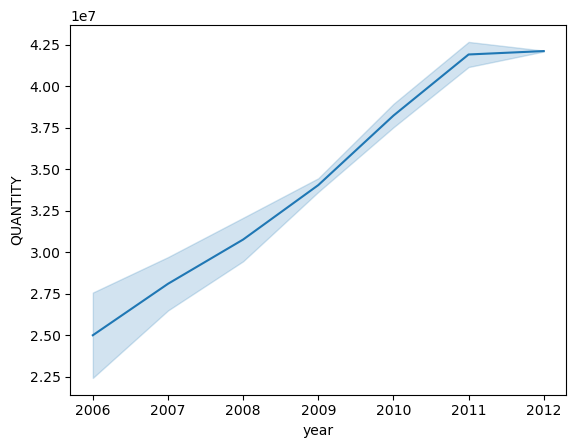

In [20]:
sns.lineplot(data=drug_df, x='year', y='QUANTITY')

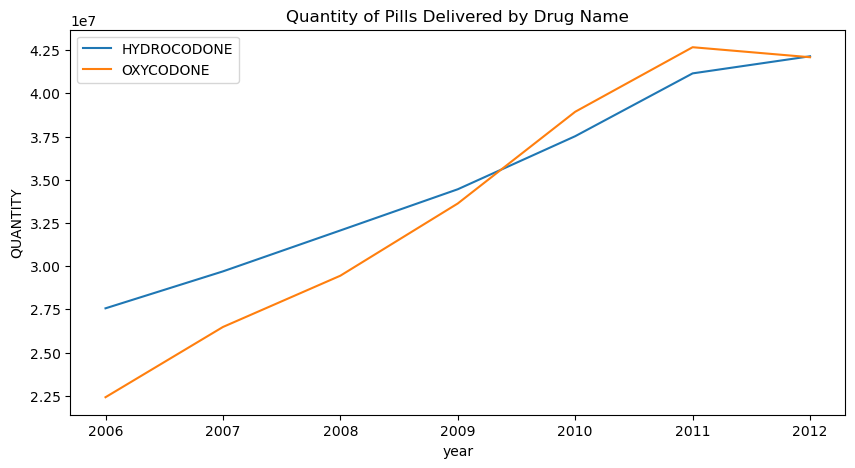

In [21]:
#Introducing the drug name as hue to show each drug performance
plt.figure(figsize=(10,5))
sns.lineplot(data=drug_df, x='year', y='QUANTITY', hue='DRUG_NAME')
plt.title('Quantity of Pills Delivered by Drug Name')
plt.legend(loc=0)

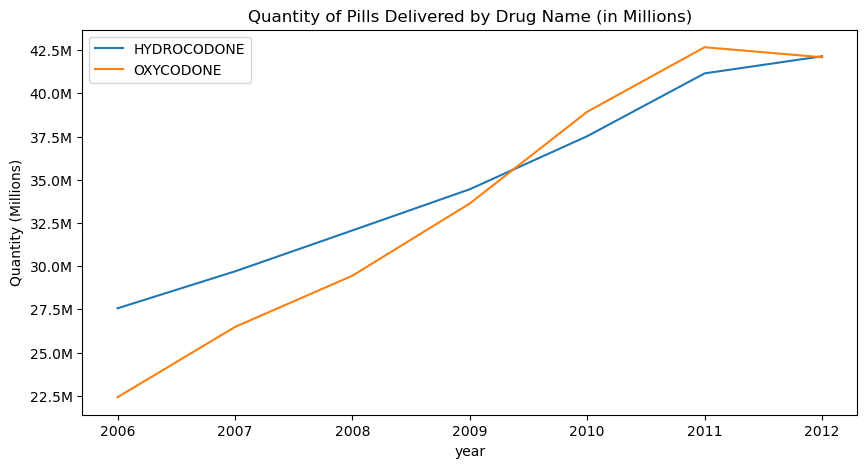

In [50]:
#i dont like the scientific notation on the y-axis so lets try to change that to show millions instead (with the help of Perplexity)

# Format y-axis to show millions first we import matplotlibs ticker and use a function to set format the y-axis

import matplotlib.ticker as ticker


plt.figure(figsize=(10,5))
ax = sns.lineplot(data=drug_df, x='year', y='QUANTITY', hue='DRUG_NAME')

# Function to format y-axis in millions
def millions_formatter(x, pos):
    return f'{x/1e6:.1f}M'

# Apply the formatter to the y-axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

plt.title('Quantity of Pills Delivered by Drug Name (in Millions)')
plt.legend(loc=0)

# Adjust y-label to reflect the new scale
plt.ylabel('Quantity (Millions)')

plt.show()

#Nice :)